## Webminicursos SBF
# Python para Físicos - Setembro/2023
Andre Nepomuceno - UFF

**Aula 4: Aplicações**

In [29]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
#opções de plot
params = {'backend': 'ps',
        'axes.labelsize': 20,
        'font.size': 10,
        'legend.fontsize': 12,
        'legend.fancybox': False,
        'legend.frameon': False,
        'xtick.labelsize': 12,
        'ytick.labelsize': 12,
        'figure.figsize': [6.8,4.8]}
plt.rcParams.update(params)

**4.1 Movimento de Projéteis**

\begin{equation}
\frac{dx}{dt} = v_x ,\;\;\;\,
\frac{dv_x}{dt} = -\frac{\beta}{m}vv_x, \\
\frac{dy}{dt} = v_y, \;\;\;\;
\frac{dv_y}{dt} = -\frac{\beta}{m}vv_v - g
\end{equation}

In [31]:
#Definfir uma função para retornar dxdt,dvxdt,dydt,dvydt
def F(t,Y,beta,m):
    g = 9.81
    x,vx,y,vy = Y
    v = np.sqrt(vx**2+vy**2)
    dxdt = vx
    dvxdt = -beta/m*v*vx
    dydt = vy
    dvydt = -g-beta/m*v*vy
    return dxdt, dvxdt,dydt,dvydt

In [32]:
#def F(t,Y,beta,m):
#    g = 9.81
#    x,vx,y,vy = Y
#    v = np.sqrt(vx**2+vy**2)
#    dxdt = vx
#    dvxdt = -beta/m*v*vx
#    dydt = vy
#    dvydt = -g-beta/m*v*vy
#    return dxdt, dvxdt,dydt,dvydt

In [33]:
#função event
def hit_ground(t,Y,beta,m):
    return Y[2]
hit_ground.terminal=True
hit_ground.direction =-1

In [34]:
#Parâmetros do problema
beta,m = 4e-5,1
angulos = [30,35,40,45,50]
theta0 = np.radians(angulos)
v0 = 700.0
t0,tf = 0,120
t = np.linspace(t0,tf,200)
solucao = []

In [35]:
#Solução para diferentes ângulos
for th in theta0:
    r0 = [0,v0*np.cos(th),0,v0*np.sin(th)] #cond. iniciais
    sol = solve_ivp(F,(t0,tf),y0=r0,args=(beta,m),t_eval=t,events=hit_ground)
    solucao.append(sol)

Text(0, 0.5, 'y [km]')

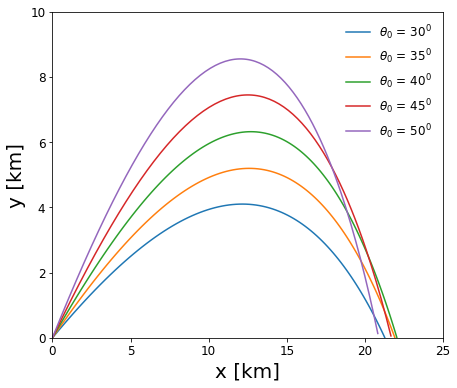

In [36]:
#Plotar y versus x em km
fig,ax = plt.subplots(figsize=(7,6))
for k in range(len(solucao)):
    ax.plot(solucao[k].y[0]/1000,solucao[k].y[2]/1000,label=r'$\theta_0$ = '+str(angulos[k])+'$^0$')
ax.set_xlim(0,25)
ax.set_ylim(0,10)
ax.legend()
ax.set_xlabel('x [km]')
ax.set_ylabel('y [km]')

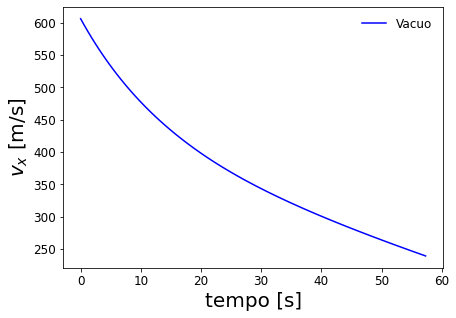

In [37]:
#Velocidade horizontal em função do tempo
plt.plot(solucao[0].t,solucao[0].y[1],c='b',label='Vacuo')
plt.xlabel('tempo [s]')
plt.ylabel('$v_x$ [m/s]')
plt.legend()

**4.2 Monte Carlo**

In [38]:
#Números pseudoaleatórios
rng = np.random.default_rng()

In [39]:
#fixar semente
rng = np.random.default_rng(32)

**Integraçã de Monte Carlo**

Consideremos a integral
\begin{equation}
I = \int_{0}^{2} sen^2\left [ \frac{1}{x(2-x)} \right] dx
\end{equation}

In [40]:
#Definir o integrando
f = lambda x: np.sin(1/(x*(2-x)))**2

Text(0, 0.5, 'f (x)')

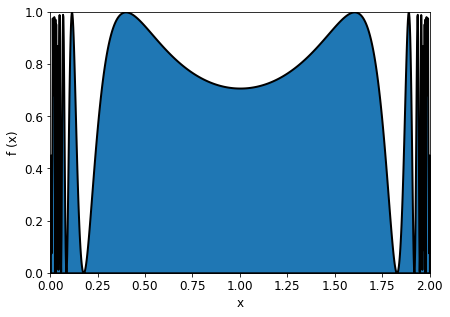

In [41]:
x1 = np.linspace(0.001,1.999,1000)
plt.fill_between(x1,f(x1),ec='k',lw=2)
plt.xlim(0,2)
plt.ylim(0,1)
plt.xlabel('x',fontsize=12)
plt.ylabel('f (x)',fontsize=12)

Text(0, 0.5, 'f (x)')

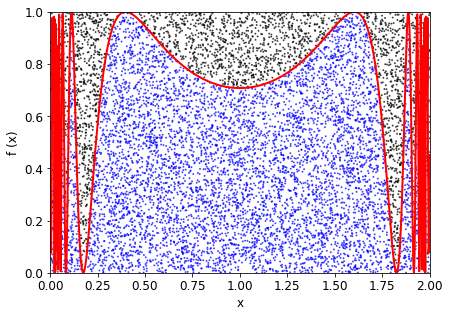

In [42]:
#Vamos calcular a integral com N = 10000 pontos
N = 10000
rng = np.random.default_rng()
x = 2*rng.random(N)
y = rng.random(N)
c = np.char.array(N*['k'])
c [y < f(x)] = 'b'
plt.scatter(x,y,c=c,s=1.0,alpha=0.6)
plt.plot(x1,f(x1),'r',lw=2)
plt.xlim(0,2)
plt.ylim(0,1)
plt.xlabel('x',fontsize=12)
plt.ylabel('f (x)',fontsize=12)

In [43]:
#Calculo da Integral 
A = 2
aceitos  = (y < f(x)).sum()
I = aceitos*A/N
print(I)

1.459


**4.3 Monte Carlo**

Text(0, 0.5, 'x')

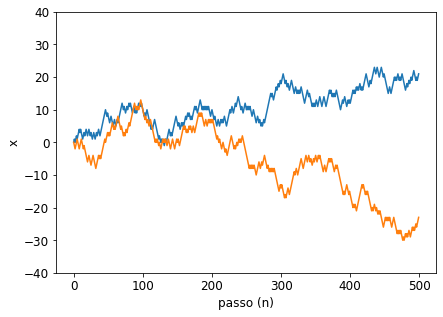

In [44]:
rng = np.random.default_rng(432)
a = [-1.,1.]
x1 = rng.choice(a,size=500)
x1[0] = 0
x1 = x1.cumsum()
x2 = rng.choice(a,size=500)
x2[0] = 0
x2 = x2.cumsum()
plt.plot(x1)
plt.plot(x2)
plt.ylim(-40,40)
plt.xlabel('passo (n)',fontsize=12)
plt.ylabel('x',fontsize=12)

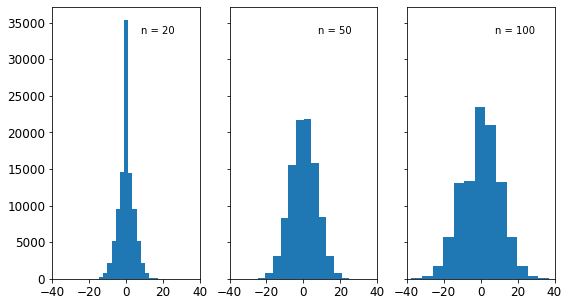

In [45]:
#distribuição da posição em n passos
fig, ax = plt.subplots(1,3,sharey=True,figsize=(9,5))
rng = np.random.default_rng(4278)
a = [-1.,1.]
Npasseios = 100000
npassos = [20,50,100]
xfinal = np.zeros((len(npassos),Npasseios))
for j in range(len(npassos)):
    y = rng.choice(a,size=(npassos[j],Npasseios))
    y[0,:] = 0
    xfinal[j,:] = np.sum(y,axis=0)
for k in range(3):
    ax[k].hist(xfinal[k,:],bins=15)
    ax[k].set_xlim(-40,40)
    ax[k].text(0.6,0.9,'n = '+str(npassos[k]),transform=ax[k].transAxes)

(-100.0, 100.0)

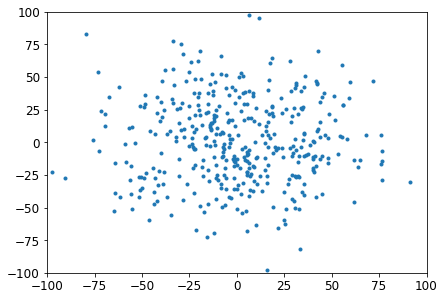

In [46]:
#Passei aleatório 2D
#passos aleatórios
N = 400
rng = np.random.default_rng()
a = [-1.,1.]
npassos = 1000
xpasso = rng.choice(a,size=(npassos,N))
xpasso[0,:] = 20*rng.random(N) - 10.
ypasso = rng.choice(a,size=(npassos,N))
ypasso[0,:] = 20*rng.random(N) - 10.
xf = np.sum(xpasso,axis=0)
yf = np.sum(ypasso,axis=0)
plt.plot(xf,yf,'.')
plt.xlim(-100,100)
plt.ylim(-100,100)